In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
df_bank = pd.read_excel("C:/Users/14086/Downloads/ALY 6020/Week 3/Bank_Personal_Loan_Modelling.xlsx")

In [18]:
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [20]:
df_bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [21]:
df_bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [22]:
df_bank.shape

(5000, 14)

In [23]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [24]:
df_bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [25]:
df_bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [26]:
df_bank = df_bank.drop_duplicates()

In [27]:
df_bank = df_bank.drop(['ID','ZIP Code'],axis=1)

In [28]:
df_bank[df_bank['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.300000,3,0,0,0,0,0,1
226,24,-1,39,2,1.700000,2,0,0,0,0,0,0
315,24,-2,51,3,0.300000,3,0,0,0,0,1,0
451,28,-2,48,2,1.750000,3,89,0,0,0,1,0
524,24,-1,75,4,0.200000,1,0,0,0,0,1,0
536,25,-1,43,3,2.400000,2,176,0,0,0,1,0
540,25,-1,109,4,2.300000,3,314,0,0,0,1,0
576,25,-1,48,3,0.300000,3,0,0,0,0,0,1
583,24,-1,38,2,1.700000,2,0,0,0,0,1,0
597,24,-2,125,2,7.200000,1,0,0,1,0,0,1


In [29]:
df_bank['Experience'] = df_bank['Experience'].abs()
df_bank[df_bank['Experience'] < 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [30]:
df_bank['Income'] = round(df_bank['Income']/12, 2)
df_bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0


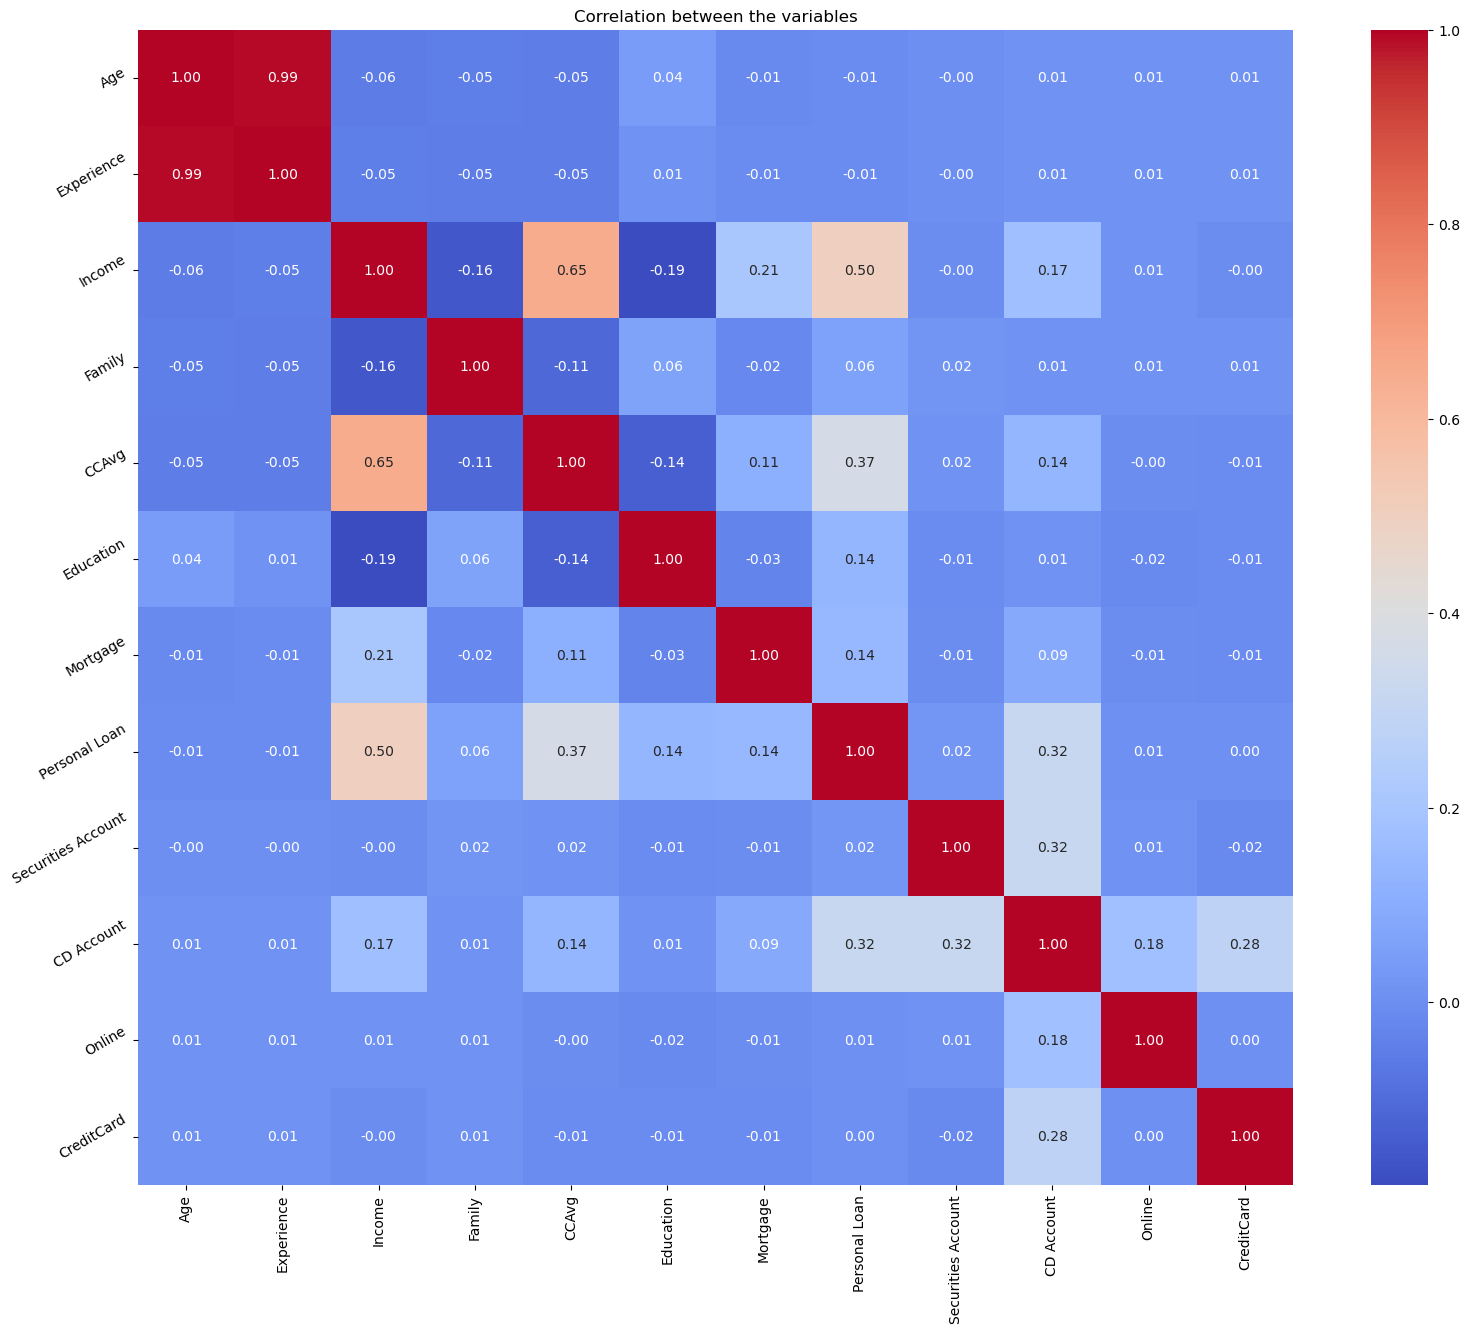

In [31]:
plt.figure(figsize=(20, 15))
cmap = sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(df_bank.corr(), annot=True, square=True, fmt='.2f', linecolor='black', cmap=cmap)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation between the variables')
plt.show()

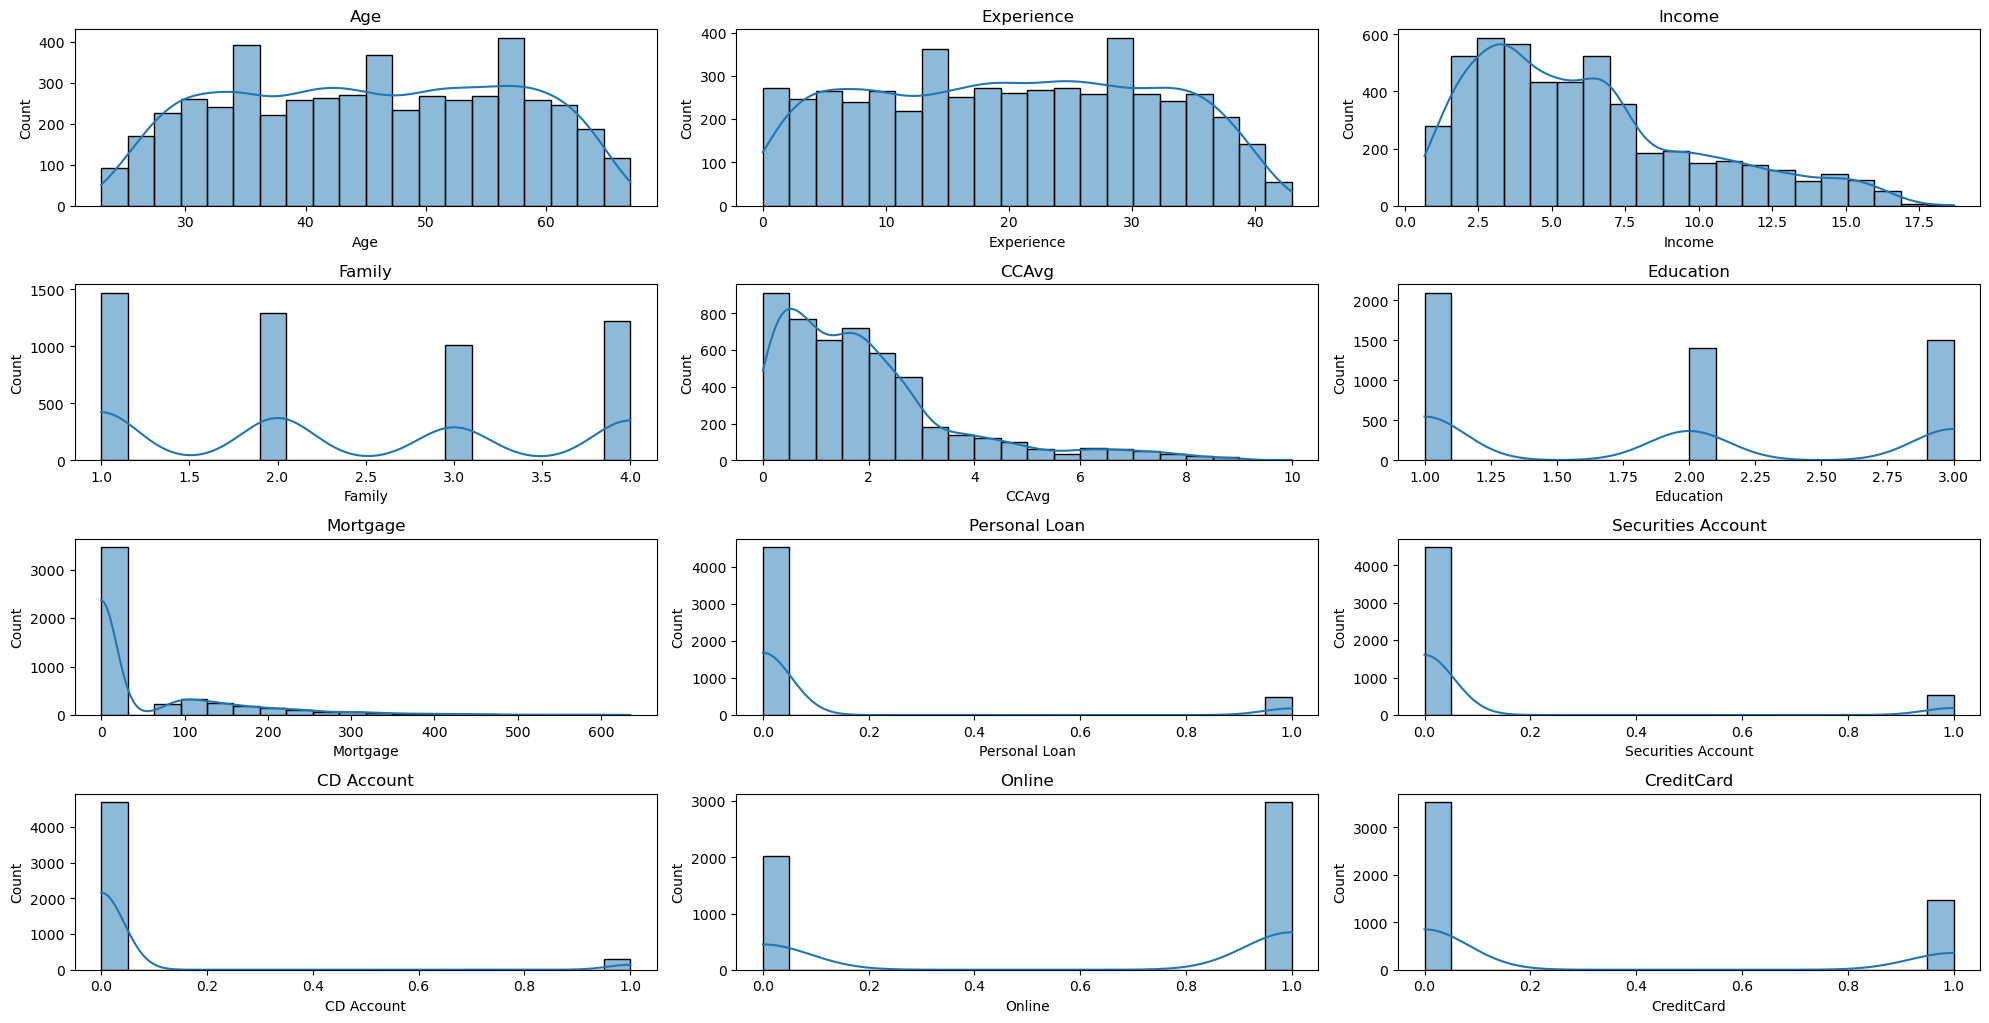

In [32]:
numerical_columns = df_bank.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))
for feature in numerical_columns:
    plt.subplot(6, 3, numerical_columns.to_list().index(feature) + 1)
    sns.histplot(data=df_bank[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

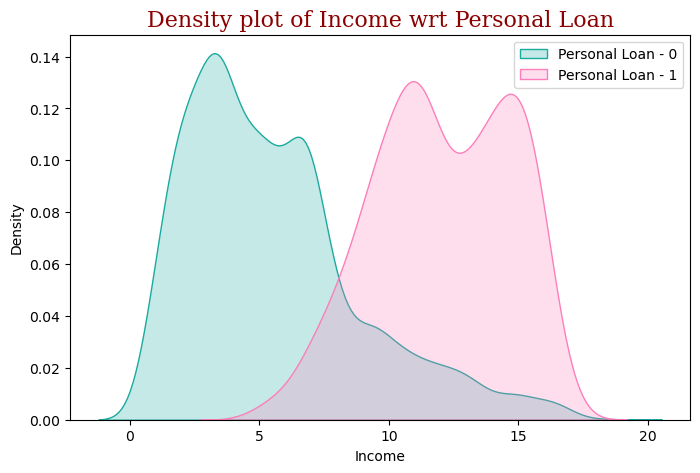

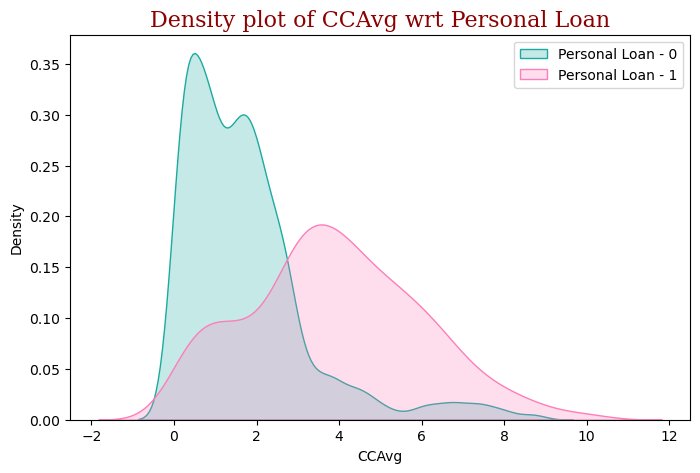

In [70]:
sns.set_palette(['#1BAAA0', '#FC7EBA']) 
FONT = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
       }
columns_to_plot = ['Income', 'CCAvg']
for j, col in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 5))
    for i, label in enumerate(df_bank['Personal Loan'].unique().tolist()):
        sns.kdeplot(df_bank.loc[df_bank['Personal Loan'] == label, col], label=f"Personal Loan - {label}", shade=True)
    plt.title(f'Density plot of {col} wrt Personal Loan', fontdict=FONT)
    plt.legend()
    plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_bank.drop('Personal Loan', axis=1)
y = df_bank['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [34]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.949
Precision: 0.846
Confusion Matrix:
 [[1325   18]
 [  58   99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.63      0.72       157

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [39]:
coefficients = pd.DataFrame(logistic_model.coef_[0], index=X.columns, columns=['Coefficient'])
significant = coefficients.abs().sort_values(by='Coefficient', ascending=False).head(3)
negative = coefficients.sort_values(by='Coefficient').index[0]

In [40]:
print("Top 3 significant variables:\n", significant)
print("Most negative variable:", negative)

Top 3 significant variables:
             Coefficient
CD Account     3.116459
Education      1.576955
CreditCard     0.950295
Most negative variable: CreditCard
